## **Project Prediksi Tarif Taxi**

Nama : Muhammad Gilang Ramadhan

- Rincian Project

Tujuan utama dari proyek ini adalah untuk membangun model predictive analytics yang dapat memprediksi tarif taksi berdasarkan berbagai faktor yang mempengaruhi harga perjalanan. Dataset yang digunakan berasal dari platform Kaggle, yang mencakup informasi terkait perjalanan taksi, seperti jarak perjalanan, waktu perjalanan, kondisi lalu lintas, cuaca, jumlah penumpang, dan tarif dasar taksi.

Melalui analisis data yang mendalam, model ini diharapkan dapat mengenali pola-pola yang ada dalam data, sehingga dapat memprediksi tarif taksi secara akurat. Fitur-fitur penting yang akan digunakan dalam model ini meliputi Trip Distance (Jarak Perjalanan), Traffic Conditions (Kondisi Lalu Lintas), Weather (Cuaca), Passenger Count (Jumlah Penumpang), dan Base Fare (Tarif Dasar).

Pada akhir proyek, tujuan utamanya adalah menghasilkan model yang dapat digunakan oleh pihak taksi atau aplikasi ride-hailing untuk menghitung tarif perjalanan secara otomatis, memberikan estimasi biaya yang akurat kepada penumpang berdasarkan kondisi nyata di lapangan. Model ini diharapkan dapat meningkatkan efisiensi dalam perencanaan tarif perjalanan dan membantu pengguna atau operator taksi untuk lebih memahami faktor-faktor yang memengaruhi harga perjalanan.


## Import Library

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

## Data Loading

In [16]:
files.upload()

Saving taxi_trip_pricing.csv to taxi_trip_pricing (1).csv


{'taxi_trip_pricing (1).csv': b'Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price\n19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.8,0.32,53.82,36.2624\n47.59,Afternoon,Weekday,1.0,High,Clear,,0.62,0.43,40.57,\n36.87,Evening,Weekend,1.0,High,Clear,2.7,1.21,0.15,37.27,52.9032\n30.33,Evening,Weekday,4.0,Low,,3.48,0.51,0.15,116.81,36.4698\n,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.618000000000002\n8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.202799999999996\n3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,,5.05,11.2645\n43.44,Evening,Weekend,3.0,,Clear,2.97,1.87,0.23,,101.1216\n30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,\n35.7,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,,75.5657\n,Morning,Weekday,4.0,,Clear,2.4,0.58,0.43,26.34,14.892\n48.53,Night,Weekday,3.0,Low,Clear,4.78,,0.5,79.94,\n41.79,Night,Weekend,3.0,High,Clear,4.6,1.77,0.11,86.95,8

In [17]:
df = pd.read_csv('/content/taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


1.   Dataset ini diambil dari salah satu platform dataset terkenal yaitu kaggle
2.   Dataset ini membuat beberapa fitur seperti Trip Distance(KM),Time of Day,Day of Week, Passenger Count, Traffic Conditions, Weather, Base Fare, Per Km Rate, Per Minute Rate,	Trip Duration Minutes, Trip Price
3. Fitur Trip Price ini akan menjadi target



## Exploratory Data Analysis

In [18]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


1.   Dataset ini terdiri dari 7 fitur dengan data numerik (float)
2.   Dan tersedia juga 4 fitur dengan data kategorikal (object)
3.   Total dari keselurahan fitur yang tersedia pada dataset ini adalah 11 fitur

jumlah data yang tidak kosong ratarata pada setiap fitur 950 namun pada trip price terdapat 951 data yang tidak kosong sedangkan pada awal dataset ini memiliki 1000 jumlah data yang artinya setiap fitur disini memiliki nilai null atau kosong (NaN)



In [20]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


1.   Pada fitur trip distance ratarata jarak perjalanan yang ditempuh sekitar 25,83 km dengan jarak perjalanan paling jauh di 146,06 km
2.   Pada fitur passenger count atau jumlah penumpang ini memiliki ratarata 2 penumpang pada setiap perjalanannya dan penumpang tertinggi dalam perjalanannya terdapat 4
3.   Biaya awal pada fitur Base Fare yang tertera memiliki nilai ratarata \$3.52 dan paling tinggi dengan \$5.00
4.  Dan selanjutanya ada biaya Per KM Rate atau biaya berdasarkan Kilometer yang memiliki nilai  rata rata \$1.22 dan paling tinggi dengan \$2.00
5.  Setelah biaya per KM adapaun biaya per Menit dengan nilai ratarata
\$0.29 dan paling tinggi di angka \$0.50
6. Durasi Perjalanan berdasarkan Menit memiliki ratarata dengan 61.8 Menit dan tertinggi dengan 119.8 menit pada perjalanannya
7. Pada fitur harga perjalanannya memiliki ratarata \$50.07 dan harga dengan perjalanan paling tinggi di angka \$332.04



## EDA - Univariate Analysis


===== Time_of_Day =====
             Jumlah Sampel  Persentase (%)
Time_of_Day                               
Afternoon              371            39.1
Morning                283            29.8
Evening                203            21.4
Night                   93             9.8


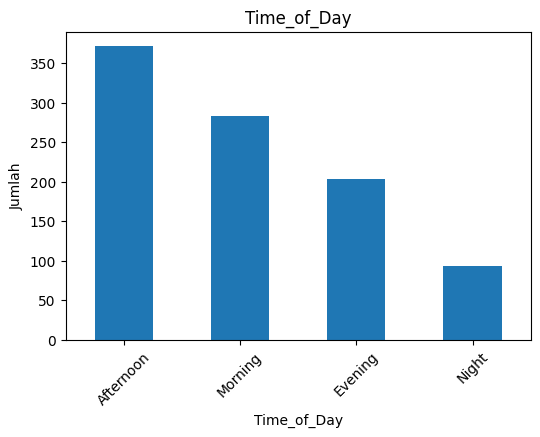


===== Day_of_Week =====
             Jumlah Sampel  Persentase (%)
Day_of_Week                               
Weekday                655            68.9
Weekend                295            31.1


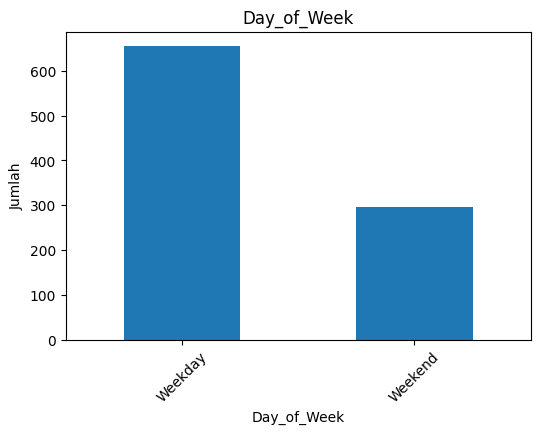


===== Traffic_Conditions =====
                    Jumlah Sampel  Persentase (%)
Traffic_Conditions                               
Low                           397            41.8
Medium                        371            39.1
High                          182            19.2


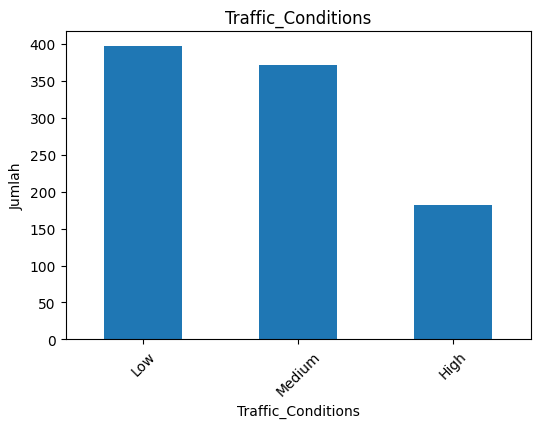


===== Weather =====
         Jumlah Sampel  Persentase (%)
Weather                               
Clear              667            70.2
Rain               227            23.9
Snow                56             5.9


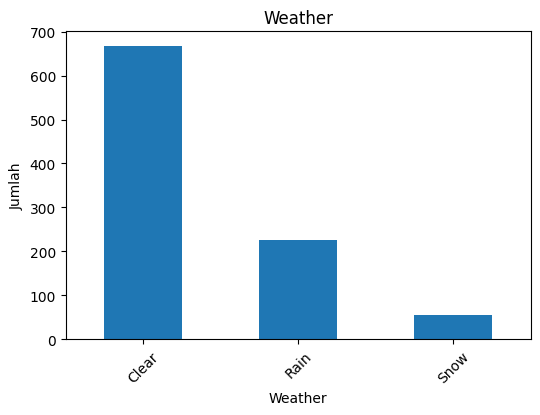

In [21]:
cols_categorical = df.select_dtypes(include=['object']).columns
for feature in cols_categorical:
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)

    summary_df = pd.DataFrame({'Jumlah Sampel': count, 'Persentase (%)': percent.round(1)})
    print(f"\n===== {feature} =====")
    print(summary_df)

    plt.figure(figsize=(6, 4))
    count.plot(kind='bar', title=feature)
    plt.ylabel('Jumlah')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

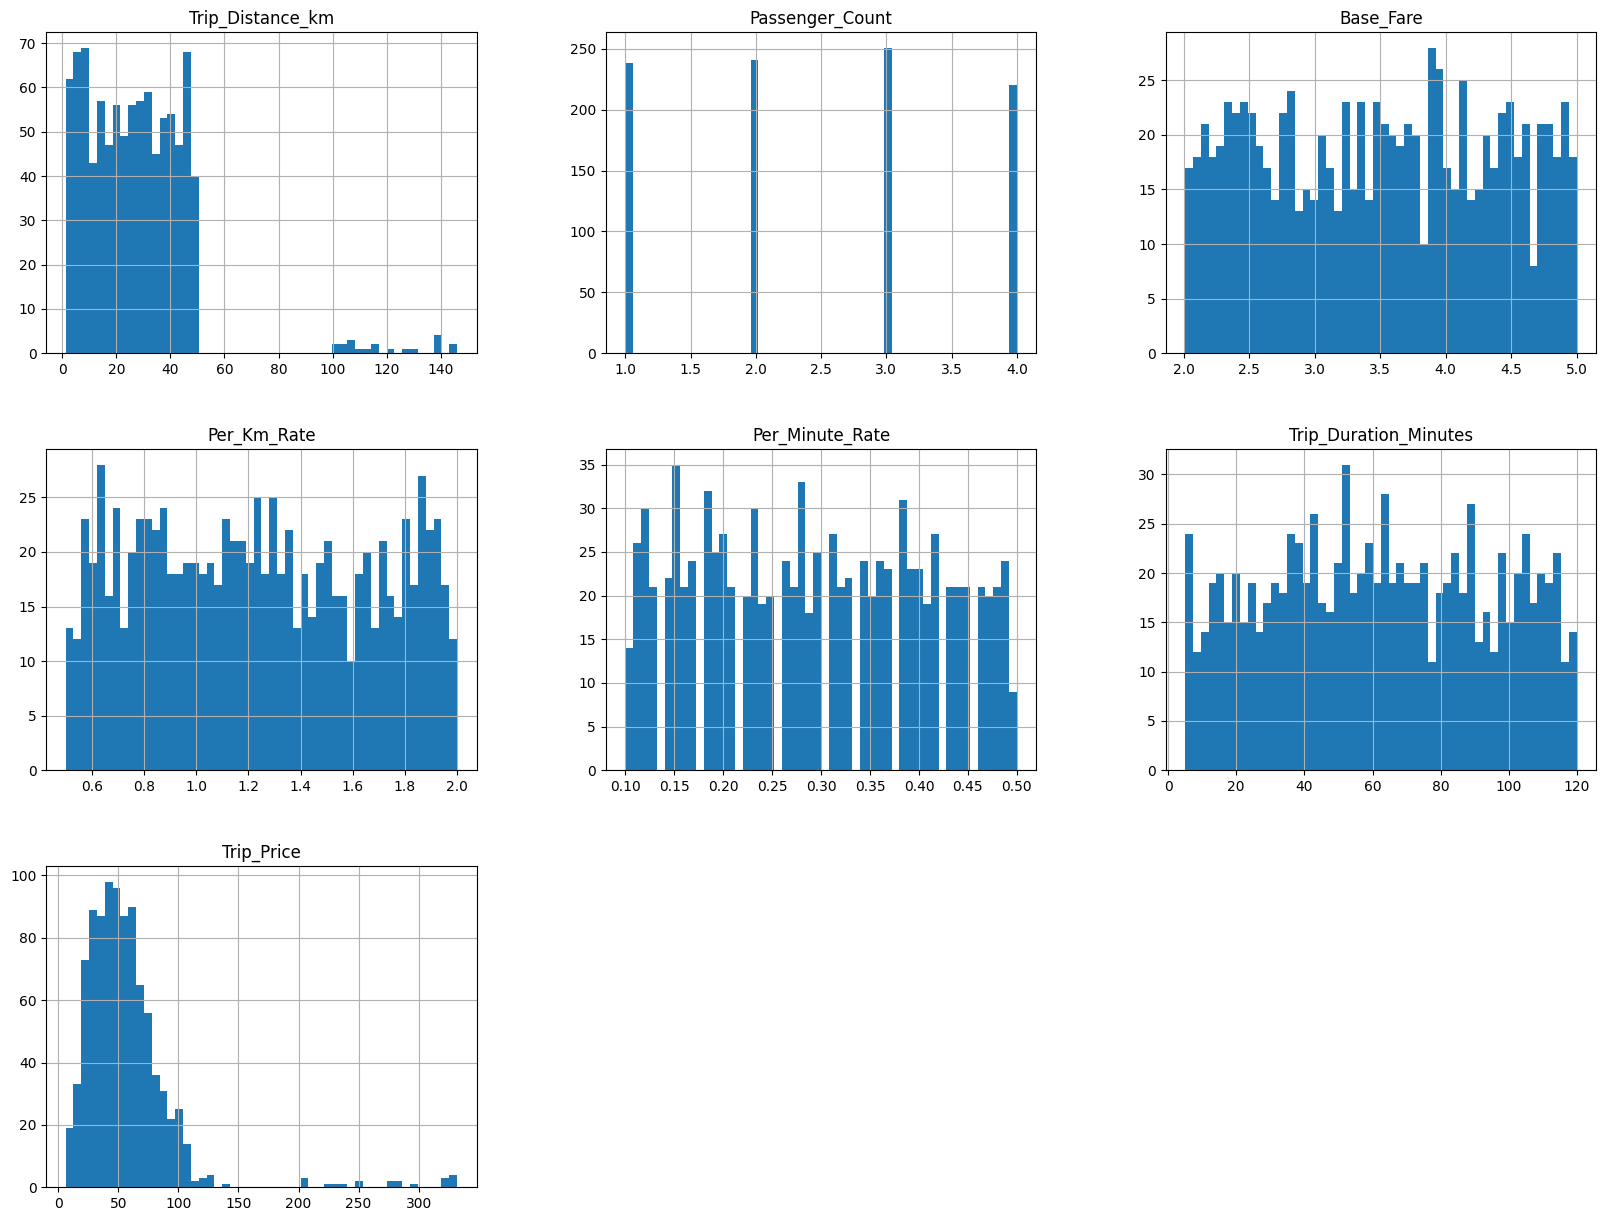

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()

*   Trip_Distance_km: Distribusi ini terlihat sangat peaked (puncak tajam) di sekitar nilai 0-50 km.
*   Passenger_Count: Ada frekuensi yang sangat tinggi untuk perjalanan dengan 1 penumpang, diikuti oleh 2 penumpang. Jumlah perjalanan dengan 3 dan 4 penumpang juga signifikan.
*   Base_Fare: Distribusi base fare juga terlihat memiliki puncak yang cukup jelas di sekitar nilai 3-4.
*   Per_Km_Rate: Histogram ini menunjukkan distribusi tarif per kilometer. Sebagian besar nilai terkumpul di rentang sekitar 0.6 hingga 1.8.
*   Per_Minute_Rate: Distribusi tarif per menit terlihat memiliki beberapa puncak, terutama di sekitar nilai 0.15, 0.30, dan 0.40.
*   Trip_Duration_Minutes: Mirip dengan "Trip_Distance_km" dan "Base_Fare", distribusi durasi perjalanan juga memiliki puncak yang jelas di sekitar nilai 50 menit.
*   Trip_Price: Distribusi harga total perjalanan ("Trip_Price") memiliki puncak yang cukup lebar di sekitar nilai 40-60. namun untuk puncaknya di sekitar 50.










# EDA - Multivariate Analysis

<ipython-input-23-6357418da9fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Trip_Price", kind="bar", dodge=False, height=4, aspect = 3, data=df, palette="Set2")
<ipython-input-23-6357418da9fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Trip_Price", kind="bar", dodge=False, height=4, aspect = 3, data=df, palette="Set2")
<ipython-input-23-6357418da9fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Trip_Price", kind="bar", dodge=False, height=4, aspect = 3, data=df, palette="Set2")
<ipython-input-23-6

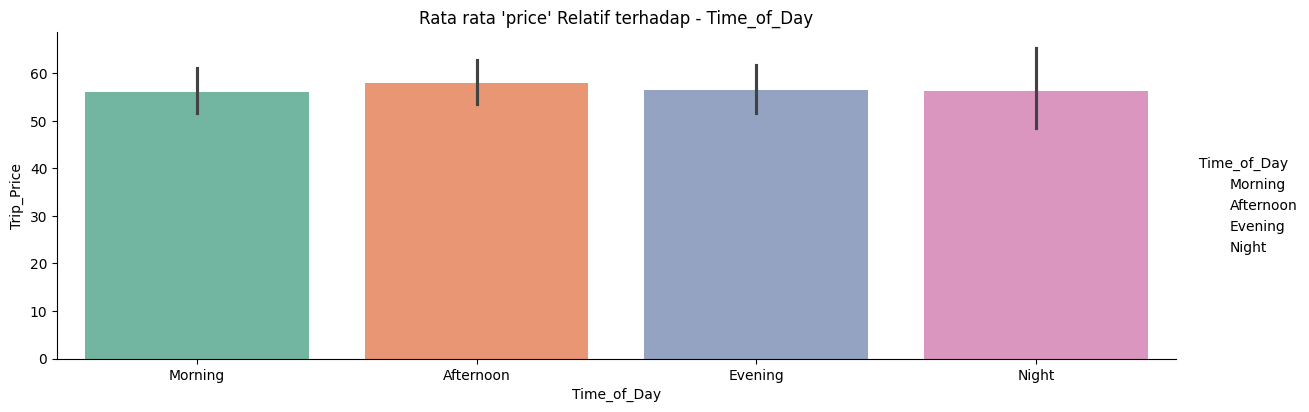

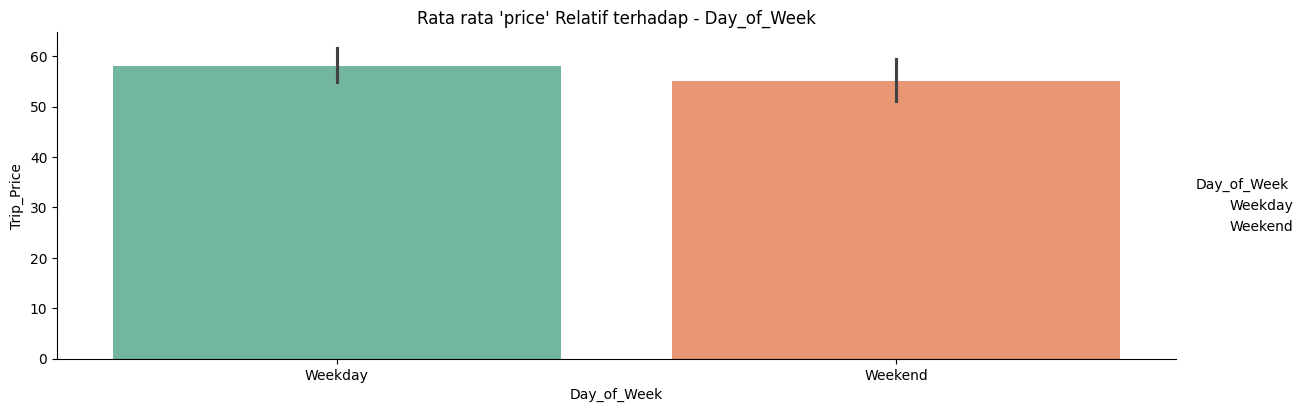

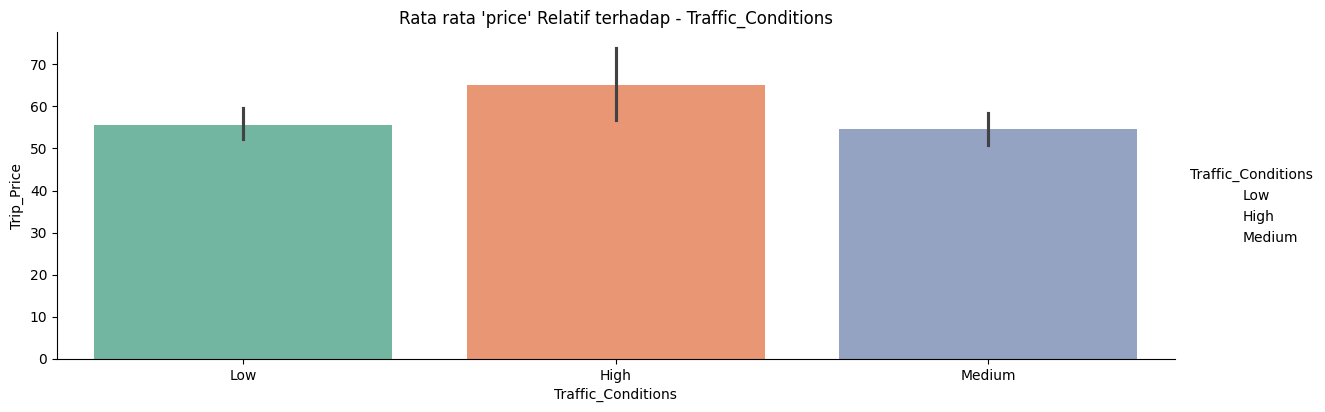

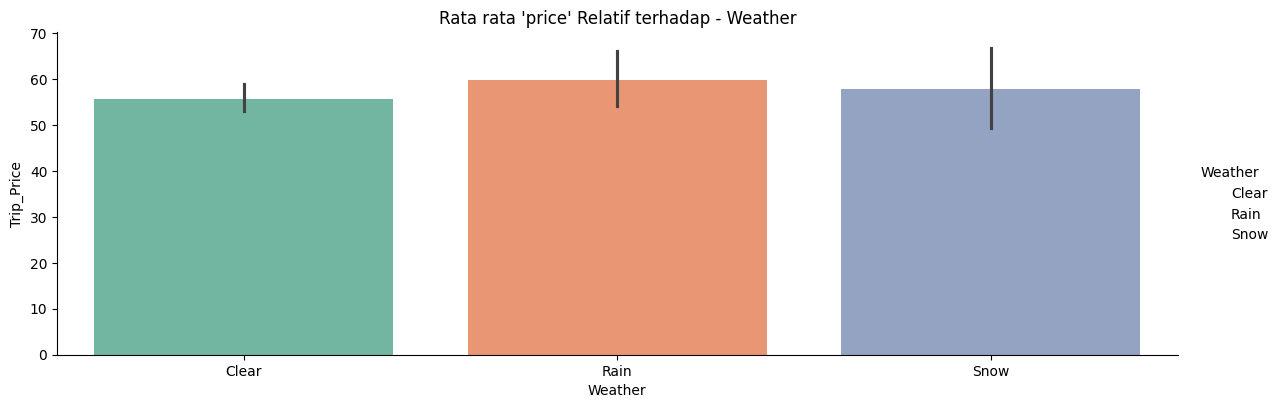

In [23]:
for col in cols_categorical:
  sns.catplot(x=col, y="Trip_Price", kind="bar", dodge=False, height=4, aspect = 3, data=df, palette="Set2")
  plt.title("Rata rata 'price' Relatif terhadap - {}".format(col))

1.   Dilihat dari ke empat hasil barplot ini bisa dibilang untuk fitur kategorikal tidak ada satupun fitur yang mempengaruhi target (Trip_Price) karena dari ke empat fitur ini menunjukkan hasil yang sama tidak ada yang berbeda dan tidak ada fitur yang relatif ke fitur target (Trip_Price)

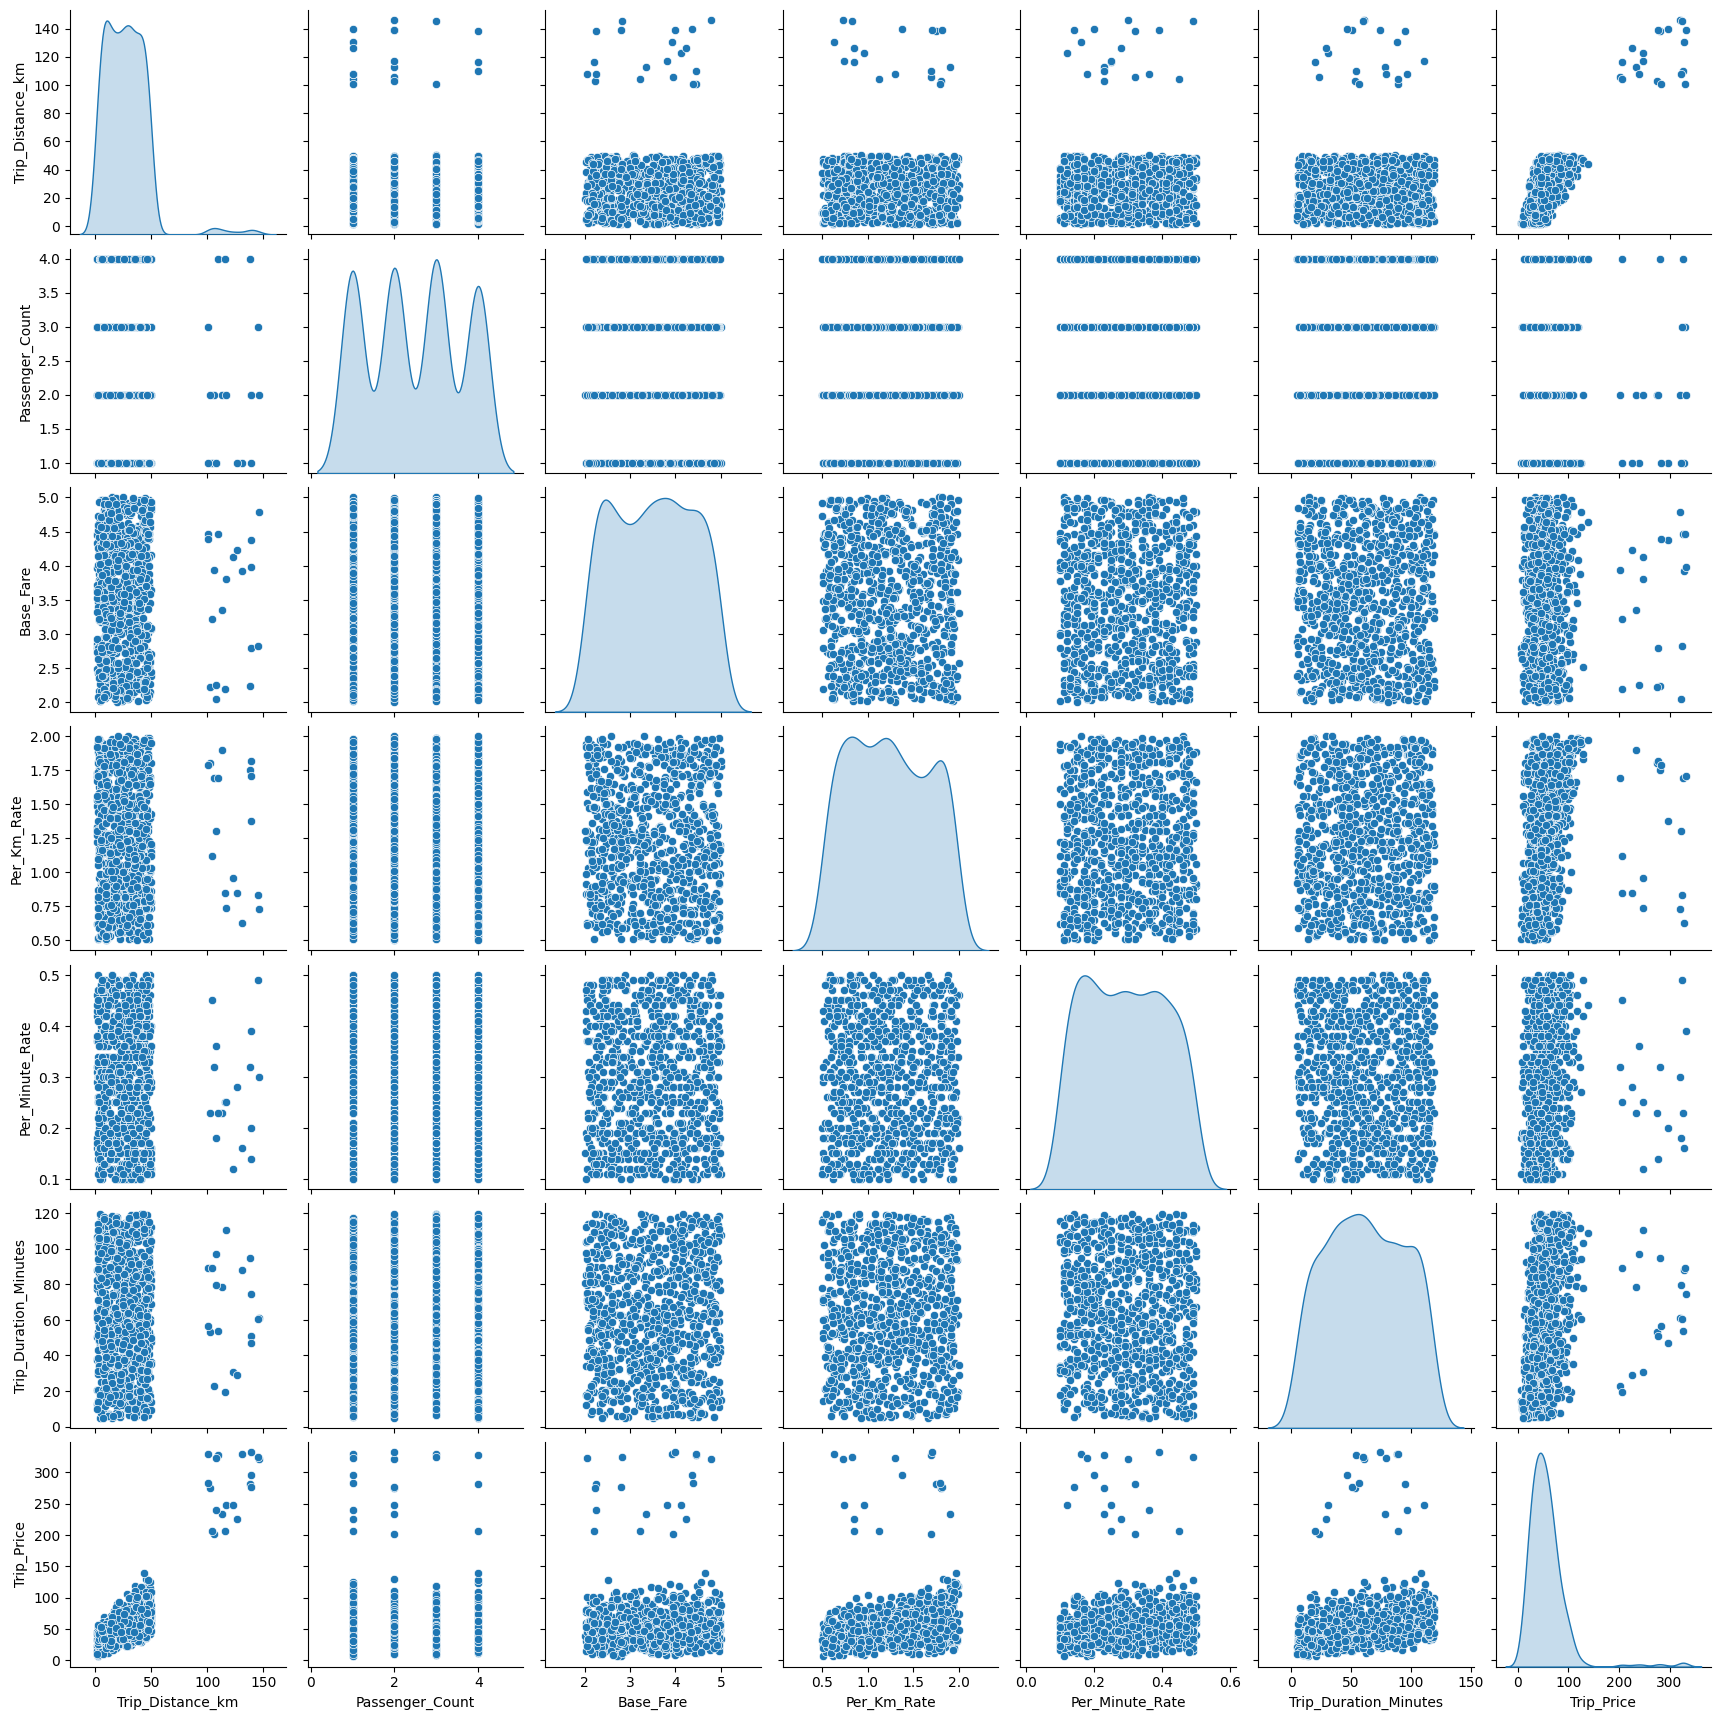

In [24]:
sns.pairplot(df, diag_kind='kde')

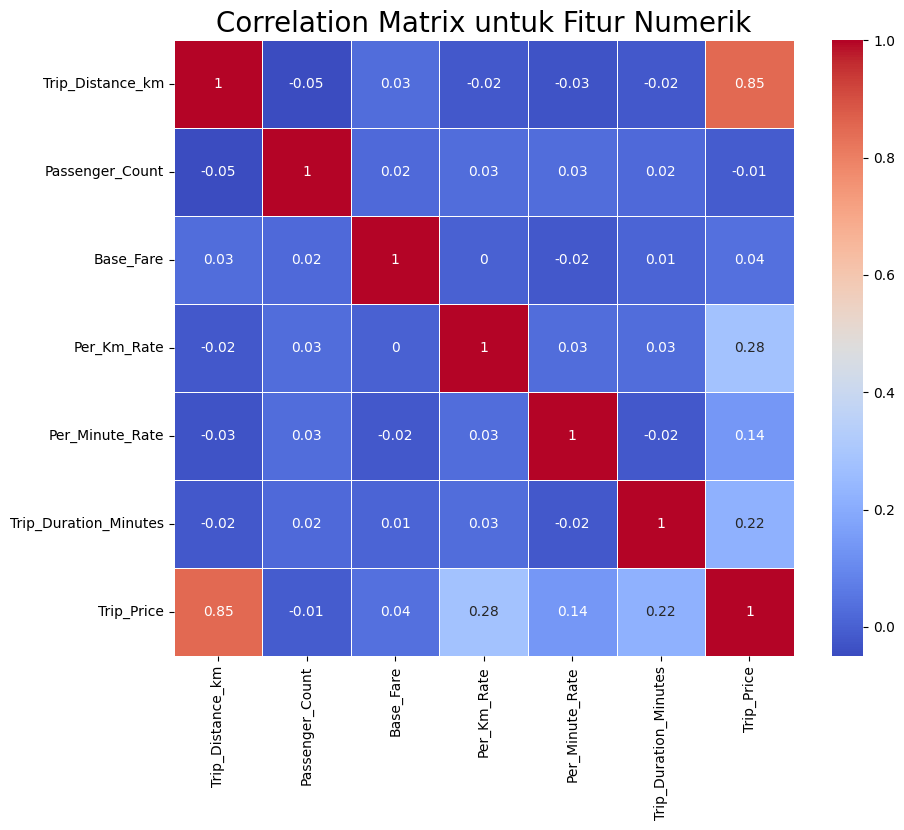

In [25]:
cols_numeric = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[cols_numeric].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

1.   Dilihat dari correlation matrix dan pairplot dengan jelas fitur target Trip_Price sangat berpengaruh ke Trip Distance KM dengan kedekatan (0.85)
2.   Fitur Per KM Rate juga sedikit berpengaruh dengan nilai kedekatan 0.28
3.   Fitur Per Minute Rate ikut berpengaruh dengan nilai kedekatan hingga 0.14
4.   Fitur Trip Duration Minutes memiliki kedekatan yang lumayan dengan fitur target sebesar 0.22



In [26]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


# Data Preparation

## Menangani Missing Values

In [27]:
data_kosong = df.isnull().sum()
data_duplikasi = df.duplicated().sum()

print(data_kosong)
print("===============================")
print(f"Data yang terindikasi duplikasi: {data_duplikasi}")

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64
Data yang terindikasi duplikasi: 0


*   Seperti indikasi yang telah disampaikan di awal dataset ini memiliki nilai kosong sebanyak 50 pada setiap fiturnya namun pada fitur trip_price hanya terdapat 49 nilai yang kosong



In [28]:
df[cols_numeric] = df[cols_numeric].fillna(df[cols_numeric].mean())

data_bersih = cols_numeric.isnull().sum()
print(f"Data kotor pada fitur numeric berjumlah: {data_bersih}")
print("========================================")
print(f"Data memiliki shape: {df.shape}")

Data kotor pada fitur numeric berjumlah: 0
Data memiliki shape: (1000, 11)


*   Pada cell ini dilakukan pembersihan data kotor pada kolom numeric dengan menambahkan nilai ratarata pada nilai yang kosong di tiap fitur tahap ini dilakukan agar data yang telah diperoleh masih dapat dilakukan untuk tahap selanjutnya



In [29]:
df[cols_categorical] = df[cols_categorical].fillna(df[cols_categorical].mode().iloc[0])

data_bersih = cols_categorical.isnull().sum()
print(f"Data kotor pada fitur categorical berjumlah: {data_bersih}")

Data kotor pada fitur categorical berjumlah: 0


*   Pada tahap ini dilakukan pembersihan data kotor yang diisi dengan nilai modus atau nilai yang paling sering muncul pada fitur kategorikal tahap ini dimaksud untuk mempertahankan jumlah data yang telah diperoleh diawal




## Menangani Outliers

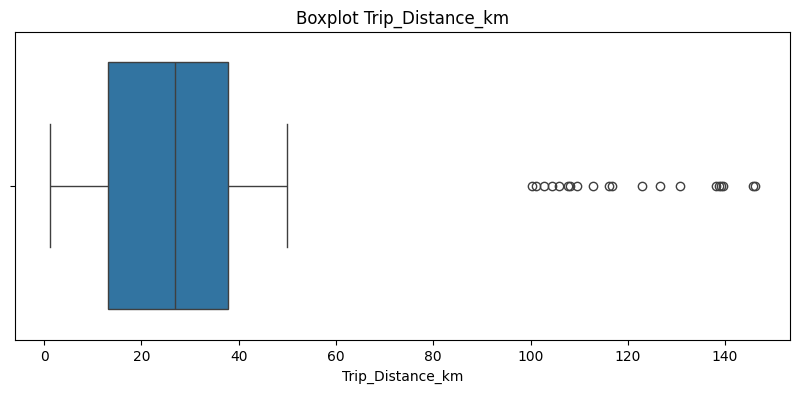

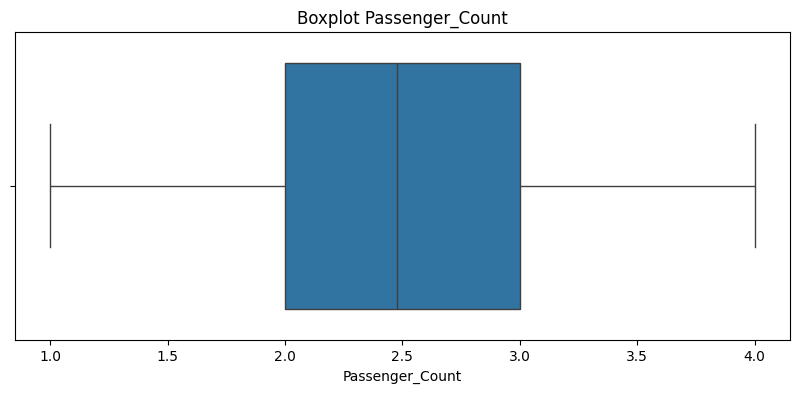

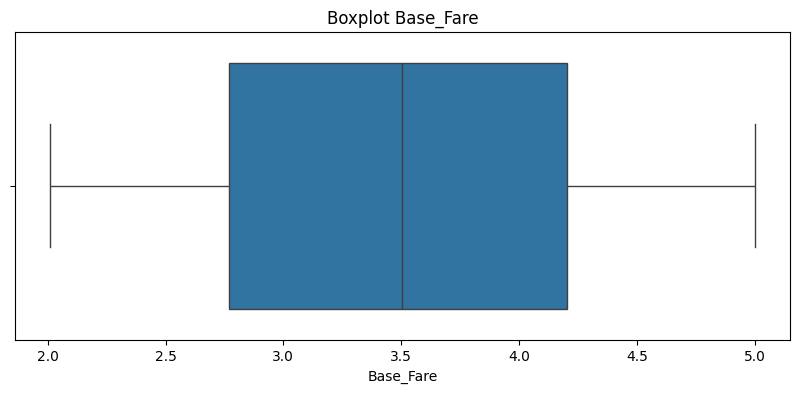

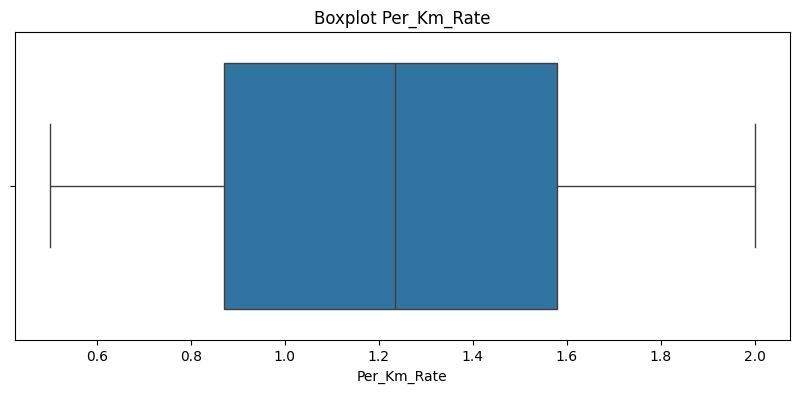

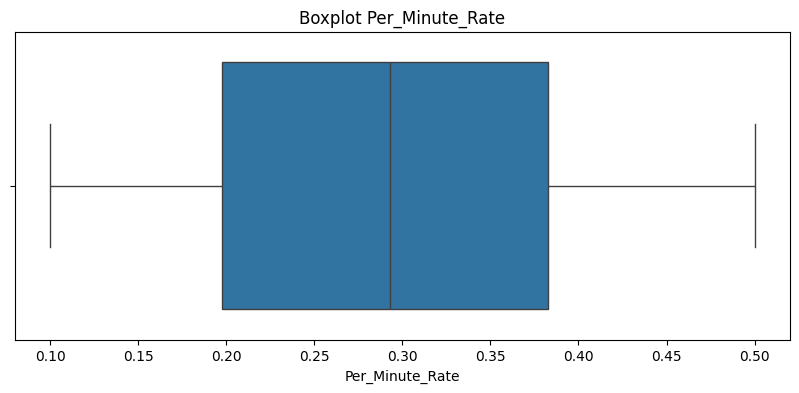

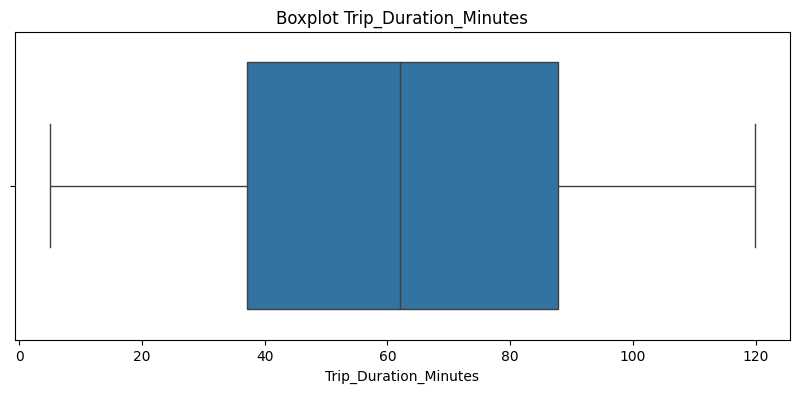

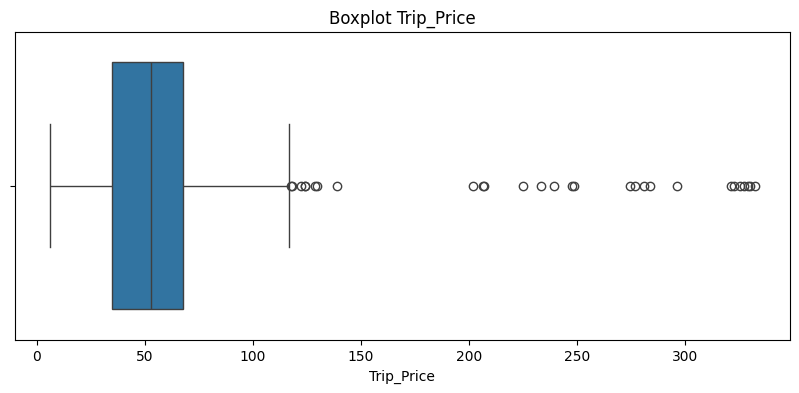

In [30]:
for col in cols_numeric:
  plt.figure(figsize=(10,4))
  sns.boxplot(data=df, x=col)
  plt.title(f'Boxplot {col}')
  plt.xlabel(col)
  plt.show()

*   Setelah tahap pembersihan data kita beranjak ke tahap pengecekan outliers atau data yang jauh dari kebanyakan data yang ada dalam dataset





In [31]:
cols_numeric = df.select_dtypes(include=['float64'])
Q1 = cols_numeric.quantile(0.25)
Q3 = cols_numeric.quantile(0.75)
IQR = Q3 - Q1

df = df[~((cols_numeric < (Q1 - 1.5 * IQR)) | (cols_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(972, 11)

In [32]:
df = pd.get_dummies(df, columns=cols_categorical, prefix=cols_categorical)
df

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.350000,3.0,3.560000,0.800000,0.320000,53.82,36.262400,False,False,True,False,True,False,False,True,False,True,False,False
1,47.590000,1.0,3.502989,0.620000,0.430000,40.57,56.874773,True,False,False,False,True,False,True,False,False,True,False,False
2,36.870000,1.0,2.700000,1.210000,0.150000,37.27,52.903200,False,True,False,False,False,True,True,False,False,True,False,False
3,30.330000,4.0,3.480000,0.510000,0.150000,116.81,36.469800,False,True,False,False,True,False,False,True,False,True,False,False
4,27.070547,3.0,2.930000,0.630000,0.320000,22.64,15.618000,False,True,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.490000,4.0,2.390000,0.620000,0.490000,58.39,34.404900,True,False,False,False,False,True,False,False,True,True,False,False
996,45.950000,4.0,3.120000,0.610000,0.292916,61.96,62.129500,False,False,False,True,True,False,False,False,True,True,False,False
997,7.700000,3.0,2.080000,1.780000,0.292916,54.18,33.123600,False,False,True,False,True,False,False,True,False,False,True,False
998,47.560000,1.0,2.670000,0.820000,0.170000,114.94,61.209000,False,False,True,False,True,False,False,True,False,True,False,False


In [33]:
X = df.drop(['Trip_Price'], axis=1)
y = df['Trip_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [34]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 972
Total # of sample in train dataset: 777
Total # of sample in test dataset: 195


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,-0.405826,0.482494,0.072257,-1.026512,0.242831,-0.255601,-0.850532,-0.507384,1.596072,-0.32139,0.652089,-0.652089,-0.465318,1.111073,-0.773747,0.624946,-0.540882,-0.240149
1,1.616450,-1.383608,0.004875,-1.460116,1.217326,-0.677433,1.175735,-0.507384,-0.626538,-0.32139,0.652089,-0.652089,2.149069,-0.900031,-0.773747,0.624946,-0.540882,-0.240149
2,0.848787,-1.383608,-0.944195,-0.038858,-1.263208,-0.782493,-0.850532,1.970894,-0.626538,-0.32139,-1.533533,1.533533,2.149069,-0.900031,-0.773747,0.624946,-0.540882,-0.240149
3,0.380455,1.415545,-0.022297,-1.725097,-1.263208,1.749772,-0.850532,1.970894,-0.626538,-0.32139,0.652089,-0.652089,-0.465318,1.111073,-0.773747,0.624946,-0.540882,-0.240149
4,0.147045,0.482494,-0.672353,-1.436027,0.242831,-1.248259,-0.850532,1.970894,-0.626538,-0.32139,0.652089,-0.652089,2.149069,-0.900031,-0.773747,0.624946,-0.540882,-0.240149


# Model Development

In [36]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['RandomForest','XGBRegressor','LinearRegression', 'SVR'])

# Model Development dengan RandomForestRegressor

In [37]:
RF = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=64, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred = RF.predict(X_train), y_true=y_train)

# Model Development dengan XGBRegressor

In [38]:
xgbRegressor = XGBRegressor(n_estimators=20, max_depth=3, random_state=64, n_jobs=-1)
xgbRegressor.fit(X_train, y_train)
models.loc['train_mse','XGBRegressor'] = mean_squared_error(y_pred = xgbRegressor.predict(X_train), y_true=y_train)

# Model Development dengan Linear Regression

In [39]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred = lr_model.predict(X_train), y_true=y_train)

# Model Development dengan SVR

In [40]:
svr_model = SVR(kernel='linear', C=200, epsilon=0.1)
svr_model.fit(X_train, y_train)
models.loc['train_mse','SVR'] = mean_squared_error(y_pred = svr_model.predict(X_train), y_true=y_train)

# Evaluasi Model

In [41]:
mse = pd.DataFrame(columns=['train','test'], index=['RF','XGBRegressor','LinearRegression','SVR'])

model_dict={'RF': RF, 'XGBRegressor': xgbRegressor, 'LinearRegression': lr_model, 'SVR':svr_model}

for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
RF,0.039201,0.062026
XGBRegressor,0.046954,0.055451
LinearRegression,0.099157,0.070246
SVR,0.100789,0.069957


1.   Untuk Model pertama yaitu RandomForestRegressor menyatakan bahwa loss dari trainnya cukup kecil di angka 0.039 namun sayangnya loss dari test sangat berbanding terbalik sangat besar di angka 0.062
2.   Lalu untuk model XGBRegressor memiliki nilai loss pada train di angka 0.046 dan nilai loss pada test di angka 0.055 yang bisa dibilang model ini ideal dan cocok untuk diterapkan
3.  Sedangkan untuk Linear Regression ini memiliki nilai loss pada train di angka 0.099 dimana angka ini sangat besar dan loss pada test adalah 0.070 angka yang sangat besar dan tidak ideal untuk diterapkan
4.  Terakhir untuk SVR ini memiliki nilai loss train paling tinggi di angka 0.100 dan nilai loss pada test rendah sekitar 0.069 sangat disayangkan karena nilai loss train tinggi model ini tidak ideal untuk diterapkan



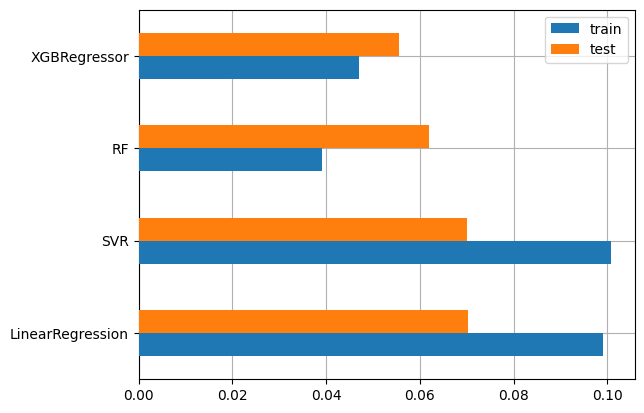

In [42]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

# Inference

In [43]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
  pred_dict['predict_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,predict_RF,predict_XGBRegressor,predict_LinearRegression,predict_SVR
190,19.145,26.5,23.5,31.8,31.4


1.   Dapat dilihat pada hasil prediksi diatas y_true menunjukkan harga aslinya
2.   Model dari RF memprediksi harga dengan hasil \$26.5 hasil ini lumayan dekat dengan nilai aslinya
3.   Model dari XGBRegressor memprediksi harga dengan hasil \$23.5 hasil ini sangat amat mendekati nilai aslinya maka dari itu model ini ideal untuk project kali ini
4.   Model LinearRegression memprediksi harga dengan hasil \$31.8 yang bilang dibilang paling jauh dari harga aslinya
5.   Terakhir pada prediksi dengan model SVR mendapatkan hasil \$31.4 namun hasil ini masih jauh dari hasil aslinya

